#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [14]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_PLAIN  ## Font type
font_scale = 2  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x,y), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 91.02806122 143.10459184]
 [ 62.78719723 116.86245675]
 [ 55.80999343 115.27153189]
 [ 81.22491349 114.83564014]
 [110.85262346 132.62268519]
 [ 42.55831038 134.29109275]
 [ 36.68870523 114.43434343]
 [ 57.49770432 132.4775023 ]
 [ 30.61222222 138.48777778]
 [ 50.40062435 133.1383975 ]
 [ 31.5470679  113.91898148]
 [ 48.02914932 113.17906008]
 [ 81.30801249 108.24557752]
 [ 51.71484375 106.86425781]
 [ 45.80124654 117.54709141]
 [ 23.14233242 108.04591368]
 [ 54.94214876 153.5922865 ]
 [ 92.4875     122.044375  ]
 [ 61.29875822 105.07962016]
 [ 35.10770975 118.84807256]
 [ 65.06       117.9125    ]
 [ 71.26938776 103.36653061]
 [ 72.000625   127.11125   ]
 [ 51.52525253 107.6134068 ]
 [120.8416955  132.48356401]
 [ 73.38561385  87.62574365]
 [ 70.26984127  94.28287982]
 [ 64.74716049  80.77283951]
 [ 78.21679688  99.10839844]
 [ 69.959375    86.68125   ]]


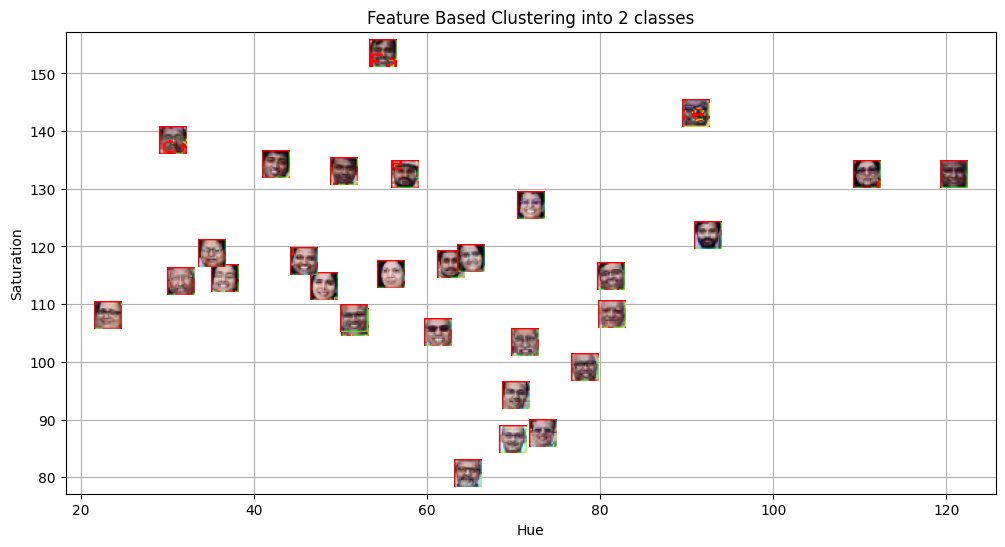

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)
## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(2).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Feature Based Clustering into 2 classes")
## Put grid
plt.grid(True)
## show the plot
plt.show()

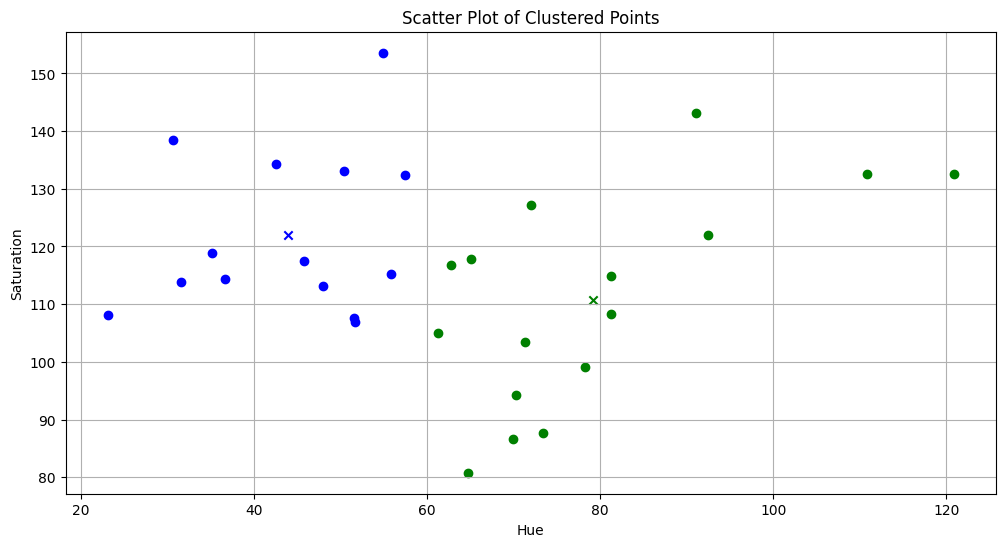

In [38]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c="green")


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c="blue")

# Calculate and plot centroids
centroid_0 = cluster_0_points.mean(axis= 0)
centroid_1 = cluster_1_points.mean(axis= 0)
# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c = "green", marker ='x')
plt.scatter(centroid_1[0], centroid_1[1], c = "blue", marker = 'x')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Scatter Plot of Clustered Points")
## Put grid
plt.grid(True)
## show the plot
plt.show()

In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

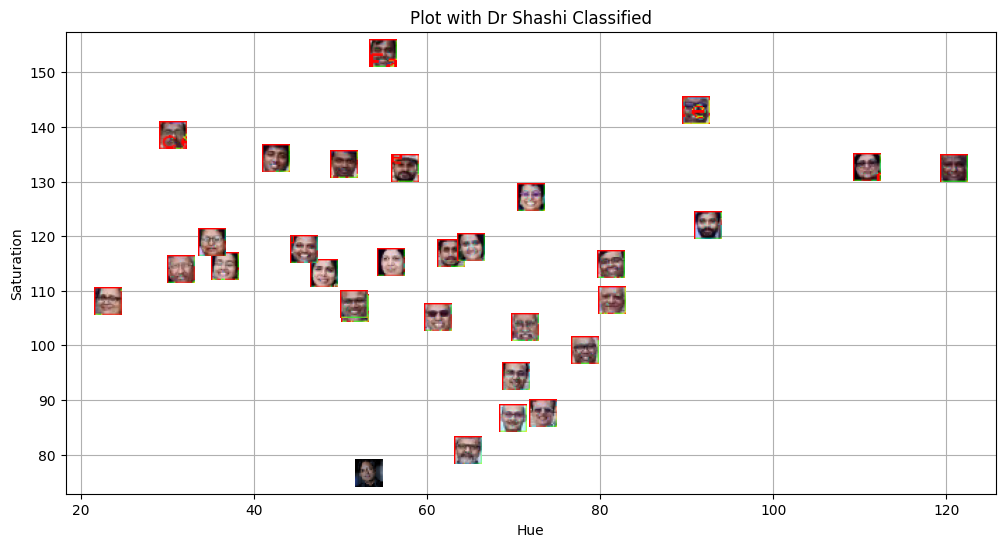

In [62]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.

x, y, w, h = template_faces[0]
face = template_hsv[y:y+h, x:x+w]
template_hue = np.mean(face[:, :, 0])
template_saturation = np.mean(face[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
pred_point = np.array([[template_hue, template_saturation]])
template_label = kmeans.predict( pred_point  )

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)
plt.plot(template_hue, template_saturation, 'o', markersize=5, color=color)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Plot with Dr Shashi Classified")
## Put grid
plt.grid(True)
## show the plot
plt.show()

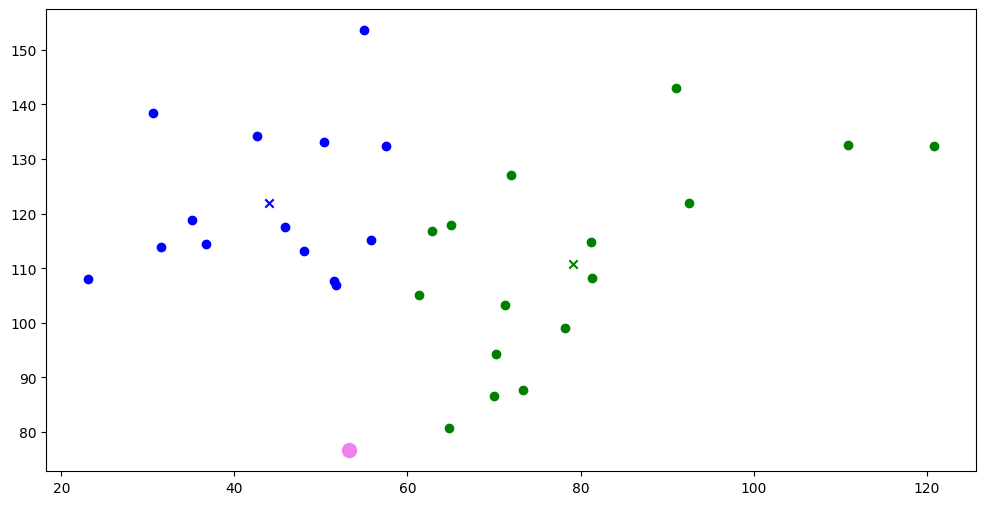

In [61]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c="green")


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c="blue")

# Calculate and plot centroids
centroid_0 = cluster_0_points.mean(axis= 0)
centroid_1 = cluster_1_points.mean(axis= 0)
# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c = "green", marker ='x') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c = "blue", marker = 'x') ## plot for centroid 1
 
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
## Put y label
## Put title
## Add a legend
## Add grid
## show the plot
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

##### Ans. Euclidian, Mahanalobus, Chebyshev distance are all examples of commonly used distances

#### 2. What are some real-world applications of distance-based classification algorithms? 

##### Ans. Image Classification Systems, Facial Recognition, Medical Diagnosis, News Classification are all real world uses of distance based classifiers

#### 3. Explain various distance metrics. 

##### Ans. Euclidian Distance is straight line distance between one point and another, Mahanlobus takes into account variance of the data before giving a distance, chebyshev distance is the way a king moves on a chess board, every step is 1

#### 4. What is the role of cross validation in model performance? 

##### Ans. Cross Validation helps reduce overfitting, as well as give an accuracy of how the model is doing

#### 5. Explain variance and bias in terms of KNN? 

##### Ans. Small k would mean high variance and low bias as it wouldn't really have alot of information to look at and high k means high bias because if one of the class has a much higher number of data points than other then it would be biased towards that class as there is a higher chance of more of those points being neighbours